In [1]:
%load_ext autoreload

In [2]:
"Figure 5."

'Figure 5.'

In [3]:
import numpy as np
import pickle

from basicOperations.manifoldOperations import tSNEmbedding
from basicOperations.manifoldOperations import matrixDistance, frechetMean, tangentMap

In [4]:
from matplotlib import font_manager
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fontPath = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Italic.ttf'
fontProp = font_manager.FontProperties(fname = fontPath)

font_manager.fontManager.addfont(fontPath)
mpl.rcParams['font.family'] = fontProp.get_name()

In [5]:
subjectNumber = 80

In [6]:
name = "../formattedData/" + str(subjectNumber) + ".pkl"

with open(name, "rb") as file:
    loadedData = pickle.load(file)

In [7]:
numberChannels = 12
numberGestures = 10
trialsPerGesture = 36

In [8]:
Features = loadedData["EMG"]
mean = np.mean(Features, axis = -1)
std = np.std(Features, axis = -1)
normalizedFeatures = (Features - mean[..., np.newaxis])/std[..., np.newaxis]
Labels = loadedData["Labels"]

Indices =  {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
for i in range(len(Labels)):
    Indices[Labels[i]].append(i)

gesturesLabels = np.zeros((numberGestures, trialsPerGesture, numberChannels, 4000))
for i in range(numberGestures):
    for j in range(trialsPerGesture):
        gesturesLabels[i, j] = normalizedFeatures[Indices[i][j], :, :4000]

In [9]:
covarianceMatrices = np.zeros((numberGestures, trialsPerGesture, numberChannels, numberChannels))

In [10]:
LABELS = []
for gesture in range(numberGestures):
    for repitition in range(trialsPerGesture):
        covarianceMatrices[gesture, repitition] = 1/4000 * (gesturesLabels[gesture, repitition, :, :4000] @ np.transpose(gesturesLabels[gesture, repitition, :, :4000]))
        LABELS.append(gesture)

In [11]:
LABELS = np.array(LABELS)
print(LABELS.shape)

(360,)


In [12]:
tSNE = tSNEmbedding()

In [13]:
out = tSNE.tSNE(covarianceMatrices, 20, numberChannels)

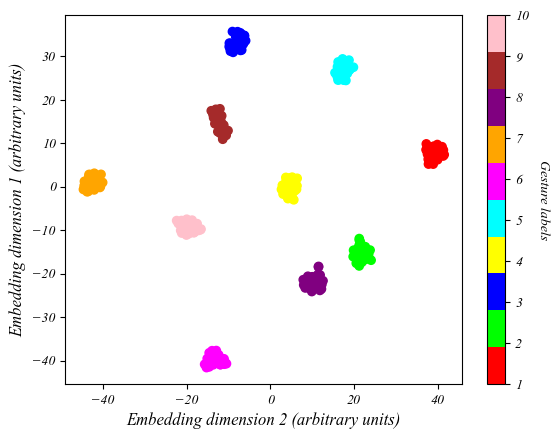

In [14]:
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#FFA500', '#800080', '#A52A2A', '#FFC0CB']

colors = ListedColormap(colors)

plt.scatter(out[:, 0], out[:, 1], c = LABELS, cmap = colors)

plt.xlabel('Embedding dimension 2 (arbitrary units)', fontproperties = fontProp, fontsize = 12)
plt.ylabel('Embedding dimension 1 (arbitrary units)', fontproperties = fontProp, fontsize = 12)

cb = plt.colorbar()
numCategories = len(set(LABELS))  
cb.set_ticks(range(numCategories))
cb.set_ticklabels([format(i + 1) for i in range(numCategories)])
cb.set_label('Gesture labels', rotation = 270, labelpad = 15)
"""plt.savefig("tSNEMatricesManifold.eps", format = "eps", bbox_inches = 'tight')"""
plt.show()
plt.close()

In [15]:
geodesicDistance = matrixDistance()
manifoldMean = frechetMean()
logMap = tangentMap()

In [16]:
meanValue = manifoldMean.mean(covarianceMatrices.reshape(-1, numberChannels, numberChannels))

In [17]:
logMapped = np.zeros((numberGestures, trialsPerGesture, numberChannels, numberChannels))

for gesture in range(numberGestures):
    for repeat in range(trialsPerGesture):
        logMapped[gesture, repeat] = logMap.logMap(covarianceMatrices[gesture, repeat], meanValue)

In [18]:
def vectorizeMatrix(matrix):

    mask = np.tril(np.ones((numberChannels, numberChannels), dtype = bool))
    lowerTriangularParts = matrix[:, mask]

    return lowerTriangularParts

In [19]:
VEC = vectorizeMatrix(logMapped.reshape(-1, numberChannels, numberChannels))
print(VEC.shape)

(360, 78)


In [20]:
from sklearn.manifold import TSNE

In [21]:
model = TSNE(metric = "euclidean", n_components = 2, random_state = 42, perplexity = 20, learning_rate = 100, early_exaggeration = 8, init = "random",)

In [22]:
out = model.fit_transform(VEC)

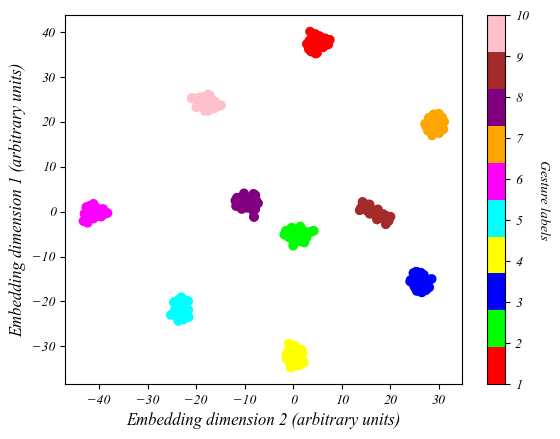

In [23]:
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#FFA500', '#800080', '#A52A2A', '#FFC0CB']

colors = ListedColormap(colors)

plt.scatter(out[:, 0], out[:, 1], c = LABELS, cmap = colors)

plt.xlabel('Embedding dimension 2 (arbitrary units)', fontproperties = fontProp, fontsize = 12)
plt.ylabel('Embedding dimension 1 (arbitrary units)', fontproperties = fontProp, fontsize = 12)

cb = plt.colorbar()
numCategories = len(set(LABELS))  
cb.set_ticks(range(numCategories))
cb.set_ticklabels([format(i + 1) for i in range(numCategories)])
cb.set_label('Gesture labels', rotation = 270, labelpad = 15)
"""plt.savefig("tSNEMatricesMapped.eps", format = "eps", bbox_inches = 'tight')"""
plt.show()
plt.close()